# Simple Gaussian Naive Bayes and EDA + KNN for Tweet Classification using sklearn

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("dataset/tweet.txt")
data

,tweet
0,brain fluid buildup delay giffords rehab
1,trailer talk week movie rite mechanic week opp...
2,rnc appoints chairman tampa convention effort ...
3,gbagbo camp futile cut ivory coast economy
4,chinese president lost translation powerful le...
...,...
2467,live moscow airport explosion
2468,supreme court refuse reinstate circuit global ...
2469,yemeni protester urged president ali abdullah ...
2470,indian navy coast guard rescue thai vessel pir...


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

## Using TF-IDF as Feature

In [4]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data.tweet)
data_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
data_tfidf

,aacons,aaron,aaup,aba,abby,abc,abdallah,abdullah,abel,absence,...,yr,yu,yuck,yum,yummy,zebco,zieralski,zone,zooey,zwak
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.327361,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data_tfidf["brain"]

0       0.420144
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
2467    0.000000
2468    0.000000
2469    0.000000
2470    0.000000
2471    0.000000
Name: brain, Length: 2472, dtype: float64

In [6]:
label = pd.read_csv("dataset/tweet_LABEL.txt")

In [7]:
from sklearn.model_selection import train_test_split
tfidf_train, tfidf_test, label_train, label_test = train_test_split(data_tfidf, label, test_size=0.33, random_state=42)

## Training 

In [8]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(tfidf_train,label_train)

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

## Predicting

In [9]:
hasil = model.predict(tfidf_test)

In [10]:
label_test = label_test.to_numpy()

In [11]:
count = 0
for x,label_pred in enumerate(hasil):
    if label_pred == label_test[x]:
        count = count + 1
print(count/len(hasil))

0.8517156862745098


#### Ga terlalu banyak beda dari hasil sebelumnya
Ini sih akibat kalau asal training tanpa merhatiin karakteristik datanya<br>
Mari kita analisa karakteristik datanya

## EDA
pakai word cloud biar tau nih tweet diklasifikasiin berdasarkan apa

In [13]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data.tweet)
data_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
data_bow

,aacons,aaron,aaup,aba,abby,abc,abdallah,abdullah,abel,absence,...,yr,yu,yuck,yum,yummy,zebco,zieralski,zone,zooey,zwak
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2468,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2469,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2470,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud( background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42,collocations=False)

In [58]:
tweet_cat = {}
for index,value in enumerate(data_bow.values):
    if int(label.values[index][0]) not in tweet_cat.keys():
        tweet_cat[label.values[index][0]] = ''
    s = ''
    for i,each in enumerate(value):
        for x in range(each):
            s = s + str(data_bow.columns[i]) + ' '
    tweet_cat[label.values[index][0]] = tweet_cat[label.values[index][0]] + s

In [60]:
import matplotlib.pyplot as plt

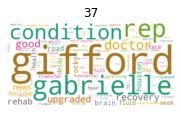

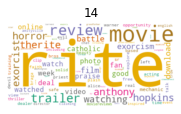

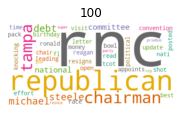

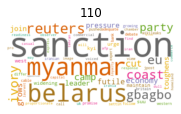

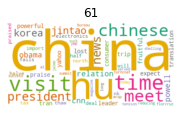

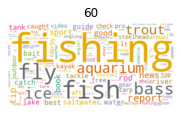

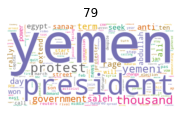

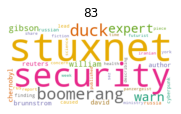

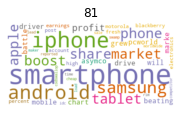

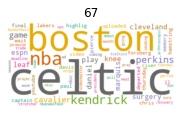

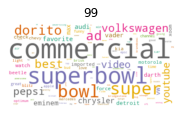

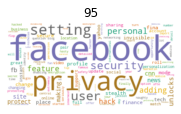

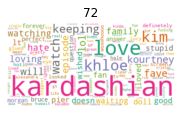

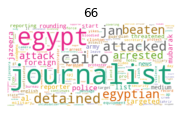

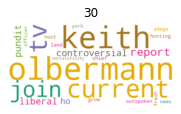

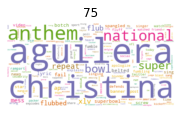

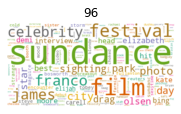

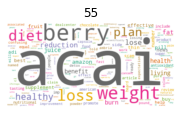

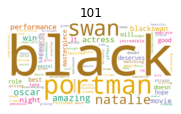

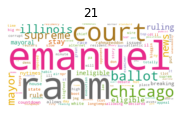

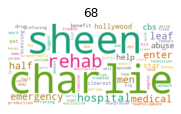

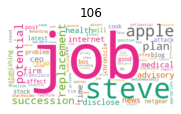

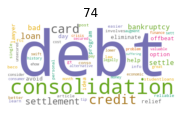

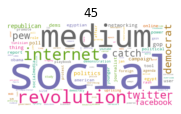

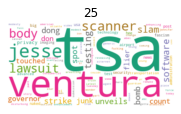

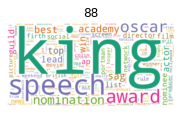

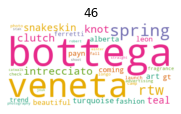

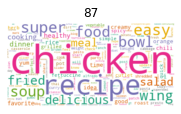

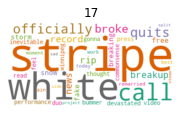

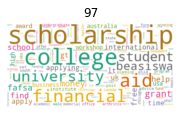

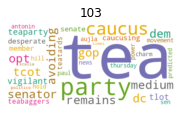

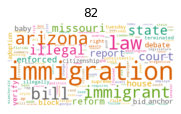

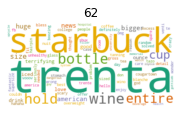

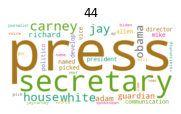

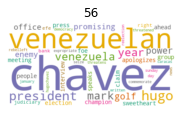

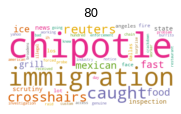

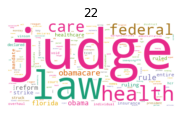

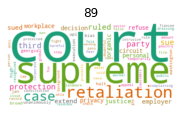

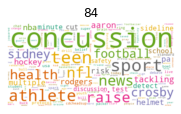

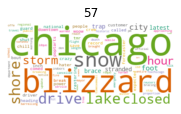

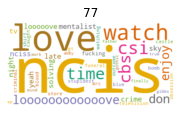

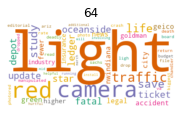

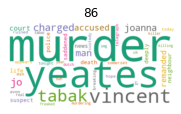

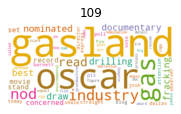

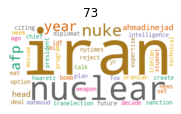

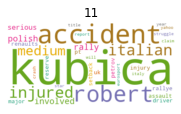

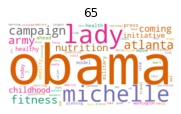

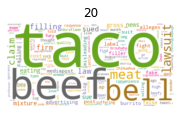

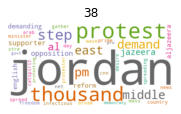

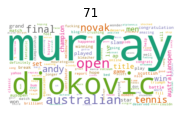

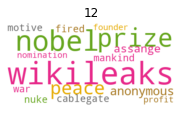

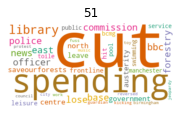

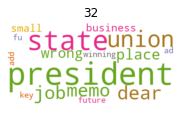

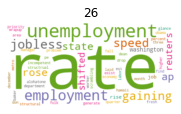

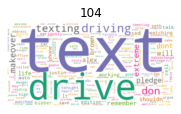

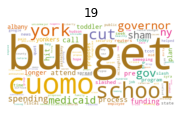

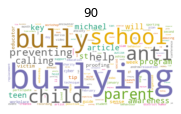

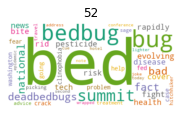

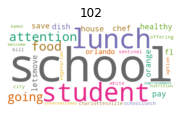

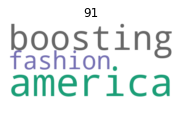

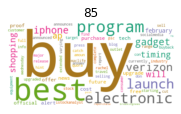

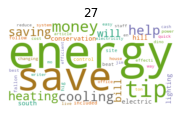

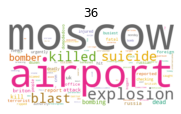

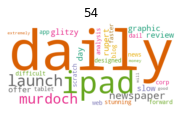

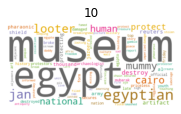

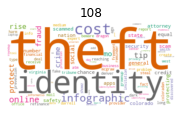

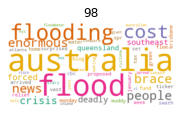

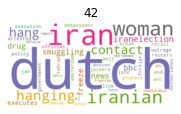

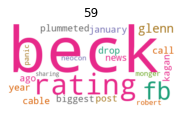

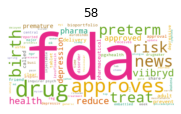

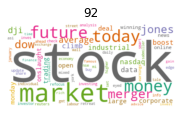

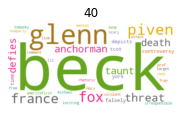

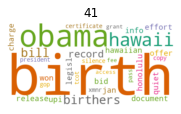

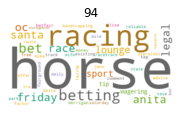

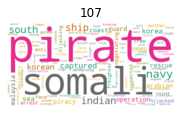

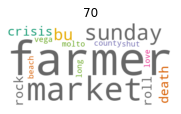

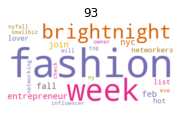

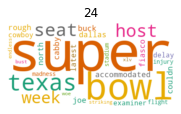

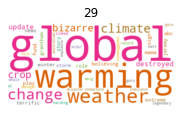

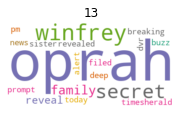

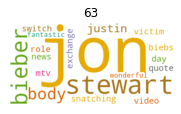

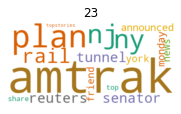

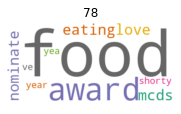

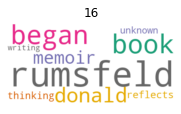

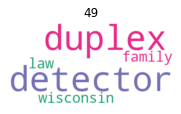

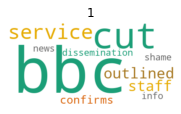

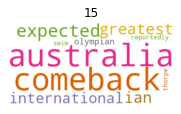

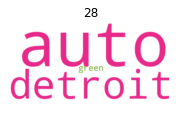

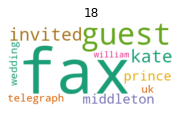

In [78]:
plt.rcParams['figure.figsize'] = [3, 4]

# full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
#               'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for key,value in tweet_cat.items():
    wc.generate(value)
    
    plt.imshow(wc, interpolation="bilinear")
    plt.title(key)
    plt.axis("off")
    plt.show()


terlihat dari wordcloud yang di hasilkan, setiap kategori memiliki kata-kata kunci tersendiri

## Coba KNN

dari EDA yang dihasilkan, menurut saya KNN akan bekerja dengan baik pada data ini<br>

In [85]:
from sklearn.neighbors import KNeighborsClassifier
plot_knn = []
for x in range(13):
    classifier = KNeighborsClassifier(n_neighbors=x+1)
    classifier.fit(tfidf_train, label_train)
    label_predknn = classifier.predict(tfidf_test)
    count = 0
    for x,label_pred in enumerate(label_predknn):
        if label_pred == label_test[x]:
            count = count + 1
    plot_knn.append(count/len(hasil))

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_s

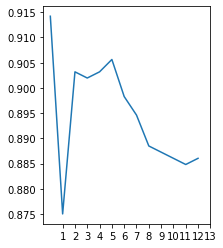

In [89]:
plt.plot(plot_knn)
plt.xticks(range(1,14))
plt.show()

In [90]:
plot_knn[0]

0.9142156862745098

hore<br>
coba BOW, karena tf idf juga menghitung idf, kemungkinan tidak diperlukan idf karena pada EDA sebelumnya masing" kategori memiliki kata kunci yang berbeda

In [91]:
cv = CountVectorizer()
bow = cv.fit_transform(data.tweet)
data_dtm = pd.DataFrame(bow.toarray(), columns=cv.get_feature_names())
data_dtm.index = data.index

In [92]:
label = pd.read_csv("dataset/tweet_LABEL.txt")

In [93]:
from sklearn.model_selection import train_test_split
bow_train, bow_test, label_train_bow, label_test_bow = train_test_split(data_dtm, label, test_size=0.33, random_state=42)

In [ ]:
label_test_bow = label_test_bow.to_numpy()

In [96]:
plot_knn = []
for x in range (13):
    classifier_bow = KNeighborsClassifier(n_neighbors=x+1)
    classifier_bow.fit(bow_train,label_train_bow)
    label_knn_bow = classifier_bow.predict(bow_test)
    count = 0
    for x,label_pred in enumerate(label_knn_bow):
        if label_pred == label_test_bow[x]:
            count = count + 1
    plot_knn.append(count/len(hasil))

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: DataConversionWa

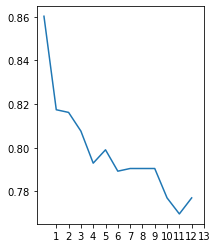

In [97]:
plt.plot(plot_knn)
plt.xticks(range(1,14))
plt.show()

In [98]:
plot_knn[0]

0.8602941176470589

ternyata tf-idf menghasilkan akurasi yang lebih baik

kalo bag of word per kategori ??  mungkin lebih cocok berdasarkan asumsi sbelumnya

In [100]:
label_list = label.values

In [102]:
import numpy as np

In [103]:
data_dtm_dict = {}
for x,y in enumerate(data_dtm.values):
    if label_list[x][0] in data_dtm_dict:
        data_dtm_dict[label_list[x][0]] = np.add(data_dtm_dict[label_list[x][0]],y)
    else:
        data_dtm_dict[label_list[x][0]] = np.array(y)

In [104]:
df_bow_class = pd.DataFrame(data_dtm_dict).transpose()

In [105]:
df_bow_class = df_bow_class.transpose()
df_bow_class.index = data_dtm.transpose().index
df_bow_class = df_bow_class.transpose()
df_bow_class

,aacons,aaron,aaup,aba,abby,abc,abdallah,abdullah,abel,absence,...,yr,yu,yuck,yum,yummy,zebco,zieralski,zone,zooey,zwak
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
classifier_bow = KNeighborsClassifier(n_neighbors=1)

In [107]:
classifier_bow.fit(df_bow_class,df_bow_class.index)
label_knn_bow = classifier_bow.predict(bow_test)

In [108]:
count = 0
for x,label_pred in enumerate(label_knn_bow):
    if label_pred == label_test_bow[x]:
        count = count + 1
print(count/len(hasil))

0.003676470588235294


0 persen ?? apakah karena belum dinormalisasi ??<br>
kelas 87 punya banyak kata" chicken, tetapi setiap dokumen hanya memiliki 1-3 kata chicken ini menyebabkan jarak dimensi yang jauh sehingga KNN tidak bekerja sesuai dengan yang diinginkan.<br>
mari coba dinormalisasi

In [109]:
def row_sum(row):
    return sum(row)
row_length = df_bow_class.apply(row_sum,axis=1)

In [110]:
norm_df_class = []
for index,x in enumerate(df_bow_class.values):
    temp = []
    for y in x:
        temp.append(y/row_length[df_bow_class.index[index]])
    norm_df_class.append(temp)

In [111]:
norm_df_class = pd.DataFrame(norm_df_class)

In [112]:
norm_df_class.columns = df_bow_class.columns
norm_df_class.index = df_bow_class.index

In [113]:
norm_df_class

,aacons,aaron,aaup,aba,abby,abc,abdallah,abdullah,abel,absence,...,yr,yu,yuck,yum,yummy,zebco,zieralski,zone,zooey,zwak
37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005076,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [114]:
row_length = data_dtm.apply(row_sum,axis=1)

In [115]:
norm_dtm = []
for index,x in enumerate(data_dtm.values):
    temp = []
    for y in x:
        temp.append(y/row_length[index])
    norm_dtm.append(temp)

In [116]:
from sklearn.model_selection import train_test_split
norm_train, norm_test, label_train_norm, label_test_norm = train_test_split(norm_dtm, label, test_size=0.33, random_state=42)

In [117]:
classifier_bow = KNeighborsClassifier(n_neighbors=1)

In [118]:
classifier_bow.fit(norm_df_class,norm_df_class.index)
label_knn_norm = classifier_bow.predict(norm_test)

In [119]:
label_test_norm = label_test_norm.to_numpy()

In [120]:
count = 0
for x,label_pred in enumerate(label_knn_norm):
    if label_pred == label_test_norm[x]:
        count = count + 1
print(count/len(hasil))

0.9644607843137255


Ada peningkatan yang signifikan<br>
Tetapi ada sedikit kekurangan dalam metode ini, fitur yang digunakan diambil dari semua data termasuk data yang digunakan untuk test, berarti model ini berpotensi overfitting<br>

In [121]:
label_train_bow = label_train_bow.to_numpy()

In [122]:
data_dtm_dict_train = {}
for x,y in enumerate(bow_train.values):
    if label_train_bow[x][0] in data_dtm_dict_train:
        data_dtm_dict_train[label_train_bow[x][0]] = np.add(data_dtm_dict_train[label_train_bow[x][0]],y)
    else:
        data_dtm_dict_train[label_train_bow[x][0]] = np.array(y)

In [123]:
df_bow_class_train = pd.DataFrame(data_dtm_dict_train).transpose()

In [124]:
df_bow_class_train.columns = bow_train.columns
df_bow_class_train

,aacons,aaron,aaup,aba,abby,abc,abdallah,abdullah,abel,absence,...,yr,yu,yuck,yum,yummy,zebco,zieralski,zone,zooey,zwak
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87,0,0,0,0,0,1,0,0,0,0,...,0,0,0,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


normalisasi

In [125]:
row_length = df_bow_class_train.apply(row_sum,axis=1)

In [126]:
row_length = row_length.to_numpy()

In [127]:
row_length

array([1074,  226, 1472,  144,  546,  997,  384,  589,  921,  260,  127,
        649,  168,  141,   87,   64,  199,  196,   20,   62,  355,   23,
        113,  274,  109,  344,   98,  242,  174,   34,   66,   97,   97,
         39,  141,  112,   92,   23,   68,   32,  158,   33,  449,   71,
         47,   30,   74,  327,  227,  164,  107,    8,   23,  130,   10,
        116,   52,  115,   43,   17,   67,   37,   55,   23,   76,   35,
         83,  133,   70,   17,   40,   27,   19,   46,  111,   19,   26,
          3,   13,    9,   59,   32,   19,   10,   37,   10,    5],
      dtype=int64)

In [128]:
norm_dtm_train = []
for index,x in enumerate(df_bow_class_train.values):
    temp = []
    for y in x:
        temp.append(y/row_length[index])
    norm_dtm_train.append(temp)

In [129]:
df_norm_train = pd.DataFrame(norm_dtm_train)

In [130]:
df_norm_train.index = df_bow_class_train.index
df_norm_train.columns = bow_train.columns
df_norm_train

,aacons,aaron,aaup,aba,abby,abc,abdallah,abdullah,abel,absence,...,yr,yu,yuck,yum,yummy,zebco,zieralski,zone,zooey,zwak
99,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
95,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
60,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000679,0.0,0.0,0.0,0.0
108,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
87,0.0,0.0,0.0,0.0,0.0,0.001832,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.007326,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.027027,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [131]:
classifier_bow = KNeighborsClassifier(n_neighbors=1)

In [132]:
classifier_bow.fit(df_norm_train,df_norm_train.index)
label_knn_norm = classifier_bow.predict(norm_test)

In [133]:
count = 0
for x,label_pred in enumerate(label_knn_norm):
    if label_pred == label_test_norm[x]:
        count = count + 1
print(count/len(hasil))

0.9203431372549019


Tidak ada peningkatan yang signifikan dari metode sebelumnya yang menghasilkan 91% ( TF-IDF ), tetapi jauh meningkat dari 87% ( BoW dan Naive Bayes(TF-IDF))